In [15]:
import pandas as pd
import matplotlib.pyplot as plt

1.⁠ ⁠Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

<ipython-input-41-d886809b5ede>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


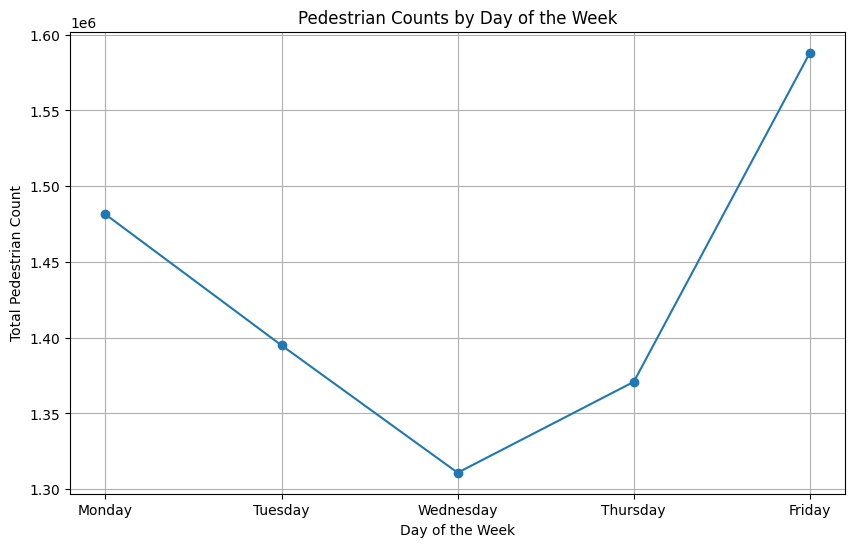

In [41]:
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"

df = pd.read_csv(url)
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df['day_name'] = df['hour_beginning'].dt.day_name()
df['day_number'] = df['hour_beginning'].dt.weekday

new_df=df[(df['day_number']>=0) & (df['day_number']<=4)]


pedestrian_counts = new_df.groupby('day_name')['Pedestrians'].sum()

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
pedestrian_counts = pedestrian_counts[ordered_days]


plt.figure(figsize=(10, 6))
plt.plot(pedestrian_counts.index, pedestrian_counts.values, marker='o')
plt.title('Pedestrian Counts by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Pedestrian Count')
plt.grid(True)
plt.show()


In [46]:
df

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
...,...,...,...,...,...,...,...,...,...,...,...,...
16052,2018-06-22 04:00:00,Brooklyn Bridge,7,4,3,partly-cloudy-night,67.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16053,2018-07-19 06:00:00,Brooklyn Bridge,192,89,103,clear-day,65.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16054,2018-06-16 16:00:00,Brooklyn Bridge,2623,1161,1462,clear-day,82.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16055,2018-07-24 18:00:00,Brooklyn Bridge,2016,1069,947,partly-cloudy-day,80.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


2.⁠ ⁠Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.


In [11]:
import seaborn as sns

df = pd.read_csv(url)
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df_2019 = df[df['hour_beginning'].dt.year == 2019]


<ipython-input-11-b972b5b2dec1>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


In [18]:

df_2019_encoded = pd.get_dummies(df_2019, columns=['weather_summary'], drop_first=True)
df_2019['Pedestrians'] = pd.to_numeric(df_2019['Pedestrians'], errors='coerce')



<ipython-input-18-24924f8f4455>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['Pedestrians'] = pd.to_numeric(df_2019['Pedestrians'], errors='coerce')


In [15]:

print(df_2019.dtypes)


hour_beginning       datetime64[ns]
location                     object
Pedestrians                   int64
Towards Manhattan             int64
Towards Brooklyn              int64
weather_summary              object
temperature                 float64
precipitation               float64
lat                         float64
long                        float64
events                       object
Location1                    object
dtype: object


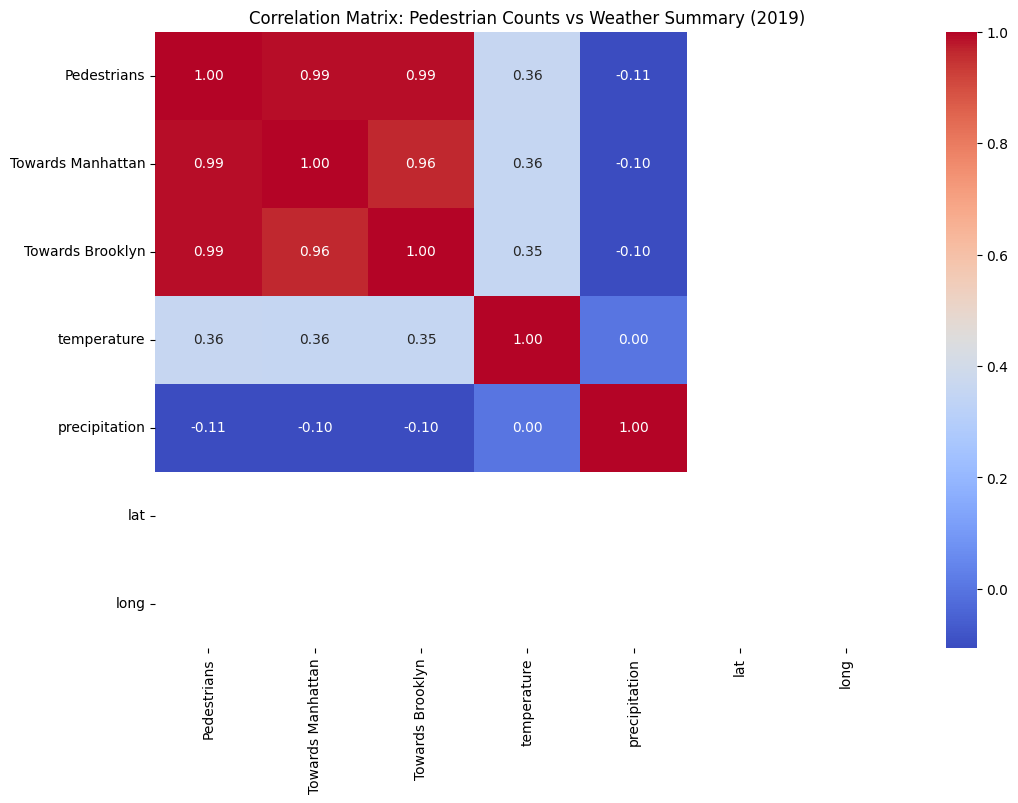

In [16]:
numeric_columns = df_2019.select_dtypes(include=['number']).columns
correlation_matrix = df_2019[numeric_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix: Pedestrian Counts vs Weather Summary (2019)')
plt.show()


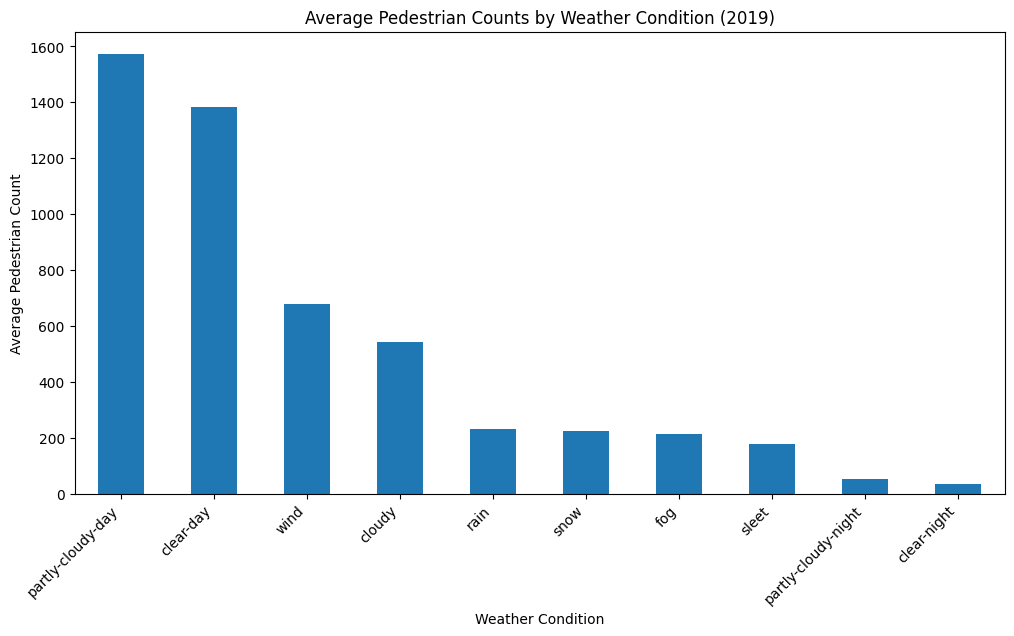

In [19]:

weather_pedestrian_avg = df_2019.groupby('weather_summary')['Pedestrians'].mean().sort_values(ascending=False)

weather_pedestrian_avg.plot(kind='bar', figsize=(12, 6))
plt.title('Average Pedestrian Counts by Weather Condition (2019)')
plt.xlabel('Weather Condition')
plt.ylabel('Average Pedestrian Count')
plt.xticks(rotation=45, ha='right')
plt.show()


3. ⁠Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.



<ipython-input-8-066d99a0452c>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_time['hour_beginning'] = pd.to_datetime(df_time['hour_beginning'])


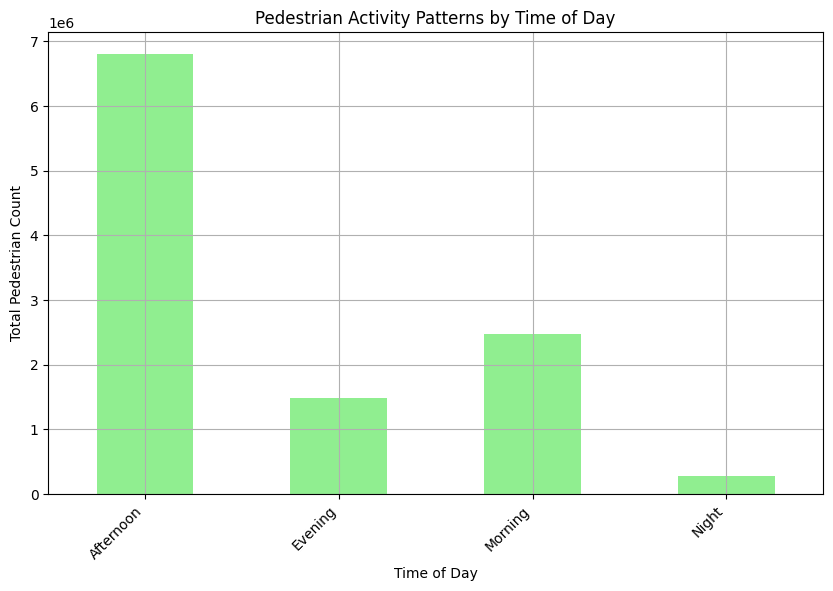

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df_time = pd.read_csv(url)
df_time['hour_beginning'] = pd.to_datetime(df_time['hour_beginning'])

# Custom function
def category(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df_time['time_of_day'] = df_time['hour_beginning'].dt.hour.apply(category)


pedestrian_activity = df_time.groupby('time_of_day')['Pedestrians'].sum()

# pedestrian activity patterns for diffrent durations of the day
plt.figure(figsize=(10, 6))
pedestrian_activity.plot(kind='bar', color='lightgreen')
plt.title('Pedestrian Activity Patterns by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Pedestrian Count')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


This shows that most pedestrians are there during the afternoon time and least during the night